In [ ]:
## como é uma única ação, tbm é recomentável usar o retorno logaritmo
# usando exemplo da P&G com Yahoo

In [6]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [7]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [8]:
 PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.014156
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,7.949917
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.837493
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,7.853557
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.821434


In [9]:
## pandas.DataFrame.shift (# de voltas), onde mudamos o índice por #, no casso o .shift(1) é 
##pra calcular em relação ao dia anterior
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004099
                ...   
2021-12-20    0.002537
2021-12-21   -0.000634
2021-12-22    0.009840
2021-12-23    0.004884
2021-12-27    0.011612
Name: log_return, Length: 6795, dtype: float64


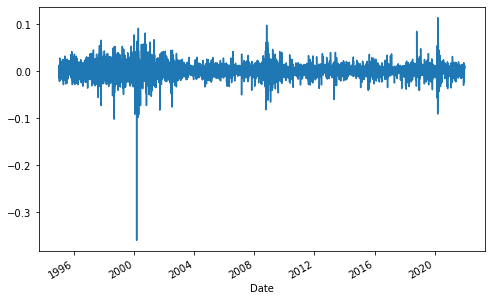

In [12]:
## criando gráfico inicial
PG['log_return'].plot(figsize=(8,5))
plt.show()

In [14]:
## log diario
## pandas.DataFrame.mean() - calcula a taxa de retorno da média diária
log_return_d = PG['log_return'].mean()
log_return_d

0.0004424788960637519

In [16]:
## multiplicando por 250 dias úteis para ter uma noção do retorno da média anual
log_returns_d = PG['log_return'].mean() * 250;
log_returns_d

0.11061972401593798

In [17]:
 ## transformando em string, arrendondando e colocando %
print(str(round(log_returns_d, 5) * 100) + '%')

11.062%
